In [1]:
# Imports

from sqlalchemy import create_engine, text, inspect, Table
import pandas as pd

In [2]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Get the parent directory (directory above the current directory)
parent_directory = os.path.dirname(current_directory)

# List all folders in the parent directory
folders_in_parent_directory = [folder for folder in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, folder))]

# Print the list of folders
print("Folders in the parent directory:")
for folder in folders_in_parent_directory:
    print(folder)

Folders in the parent directory:
opt
srv
root
media
home
tmp
var
dev
sbin
lib
etc
sys
libx32
run
proc
lib64
boot
lib32
usr
bin
mnt
notebook
data


   Unnamed: 0        date  temp_mean  temp_max  temp_min           sunrise  \
0           0  2013-01-01        0.1       3.9      -2.8  2013-01-01T08:45   
1           1  2013-01-02        1.1       5.8      -2.4  2013-01-02T08:45   
2           2  2013-01-03        3.0       6.2      -0.9  2013-01-03T08:44   
3           3  2013-01-04        7.8       8.9       6.5  2013-01-04T08:44   
4           4  2013-01-05        7.8       9.2       5.8  2013-01-05T08:44   

             sunset  rain  snow  country capital   latitude  longitude  
0  2013-01-01T17:11   0.0   0.0  Austria  Vienna  47.516231  14.550072  
1  2013-01-02T17:12   0.8   0.0  Austria  Vienna  47.516231  14.550072  
2  2013-01-03T17:13   0.7   0.0  Austria  Vienna  47.516231  14.550072  
3  2013-01-04T17:14   2.7   0.0  Austria  Vienna  47.516231  14.550072  
4  2013-01-05T17:15  11.0   0.0  Austria  Vienna  47.516231  14.550072  


In [3]:
# Create a SQLAlchemy engine to connect to the PostgreSQL database
engine = create_engine("postgresql://student:infomdss@db_dashboard:5432/dashboard")

# Establish a connection to the database using the engine
# The 'with' statement ensures that the connection is properly closed when done
#with engine.connect() as conn:
    # Execute an SQL command to drop the 'population' table if it exists
    # The text() function allows you to execute raw SQL statements
#    result = conn.execute(text("DROP TABLE IF EXISTS weather CASCADE;"))

# Assuming you have a DataFrame named 'world_population_df', the following line
# writes the data from the DataFrame to a new 'population' table in the database
# If the 'population' table already exists, it will be replaced with the new data
# This prints the number of rows entered in the database table
#weather_df.to_sql("weather", engine, if_exists="replace", index=True)

In [34]:
# Read data from the SQL table named 'population' using pandas
# 'pd.read_sql_table' is a pandas function that reads data from an SQL table
# 'db_conn' is the database connection object previously established
weather_table = pd.read_sql_table('weather', engine, index_col='index')

# This line prints the entire DataFrame to the output
print(weather_table['date'])

index
0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
354139   2015-03-11
354140   2015-03-12
354141   2015-03-13
354142   2015-03-14
354143   2015-03-15
Name: date, Length: 354144, dtype: datetime64[ns]


In [39]:
import statistics

def mean_temp():
    query_1 = '''SELECT w.temp_mean
                 FROM weather as w
                 WHERE w.country = '%s'
                 AND TO_CHAR(w.date, 'YYYY-MM-DD') LIKE '%s-%s-__'
              ''' % (country_value, year, formatted_month)
    table_1 = pd.read_sql(query_1, db_conn) if not query_1.isspace() else pd.DataFrame()
    if not table_1.empty:
        meantemp_int = table_1['temp_mean'].astype(int)
        meantemp_value = statistics.mean(meantemp_int)
        monthly_temp_data.append(meantemp_value)
        temp_date.append(formatted_date) 

def mean_rainfall():
    query_1 = '''SELECT w.rain
                 FROM weather as w
                 WHERE w.country = '%s'
                 AND TO_CHAR(w.date, 'YYYY-MM-DD') LIKE '%s-%s___'
              ''' % (country_value, year, formatted_month)
    table_1 = pd.read_sql(query_1, db_conn) if not query_1.isspace() else pd.DataFrame()
    if not table_1.empty:
        meanrain_float = table_1['rain'].astype(float)
        meanrain_value = statistics.mean(meanrain_float)
        monthly_rain_data.append(meanrain_value)
        rain_date.append(formatted_date) 

def mean_snow():
    query_1 = '''SELECT w.snow
                 FROM weather as w
                 WHERE w.country = '%s'
                 AND TO_CHAR(w.date, 'YYYY-MM-DD') LIKE '%s-%s___'
              ''' % (country_value, year, formatted_month)
    table_1 = pd.read_sql(query_1, db_conn) if not query_1.isspace() else pd.DataFrame()
    if not table_1.empty:
        meansnow_float = table_1['snow'].astype(float)
        meansnow_value = statistics.mean(meansnow_float)
        monthly_snow_data.append(meansnow_value)
        snow_date.append(formatted_date)
        
def mean_sunhours():
    query = '''
        SELECT 
        w.sunrise as sunrise_time,
        w.sunset as sunset_time
        FROM weather as w
        WHERE w.country = '%s'
        AND TO_CHAR(w.date, 'YYYY-MM-DD') LIKE '%s-%s___'
        ''' % (country_value, year, formatted_month)

    table_suntime = pd.read_sql(query, db_conn) if not query.isspace() else pd.DataFrame()
    table_suntime['sunrise_time'] = pd.to_datetime(table_suntime['sunrise_time'], format='%Y-%m-%dT%H:%M')
    table_suntime['sunset_time'] = pd.to_datetime(table_suntime['sunset_time'], format='%Y-%m-%dT%H:%M')

    table_suntime['time_difference'] = (table_suntime['sunset_time'] - table_suntime['sunrise_time']).dt.total_seconds() / 3600.0
    if not table_suntime.empty:
        meansuntime_value = statistics.mean(table_suntime['time_difference'])
        montly_sunhours_data.append(meansuntime_value)
        sunhours_date.append(formatted_date)                                   
        
db_conn = engine.connect()
country_value = 'Austria'
temperature = True
rainfall = True
snowfall = True
sunhours = True

monthly_temp_data = []
temp_date = []
monthly_rain_data = []
rain_date = []
monthly_snow_data = []
snow_date = []
montly_sunhours_data = []
sunhours_date = []

for year in range(2013, 2024):
    for month in range(1, 13):
        formatted_month = str(month).zfill(2)
        formatted_date = f"{year}.{formatted_month}"
        
        if temperature:
            mean_temp()
            
        if rainfall:
            mean_rainfall()

        if snowfall:
            mean_snow()

        if sunhours:
            mean_sunhours()

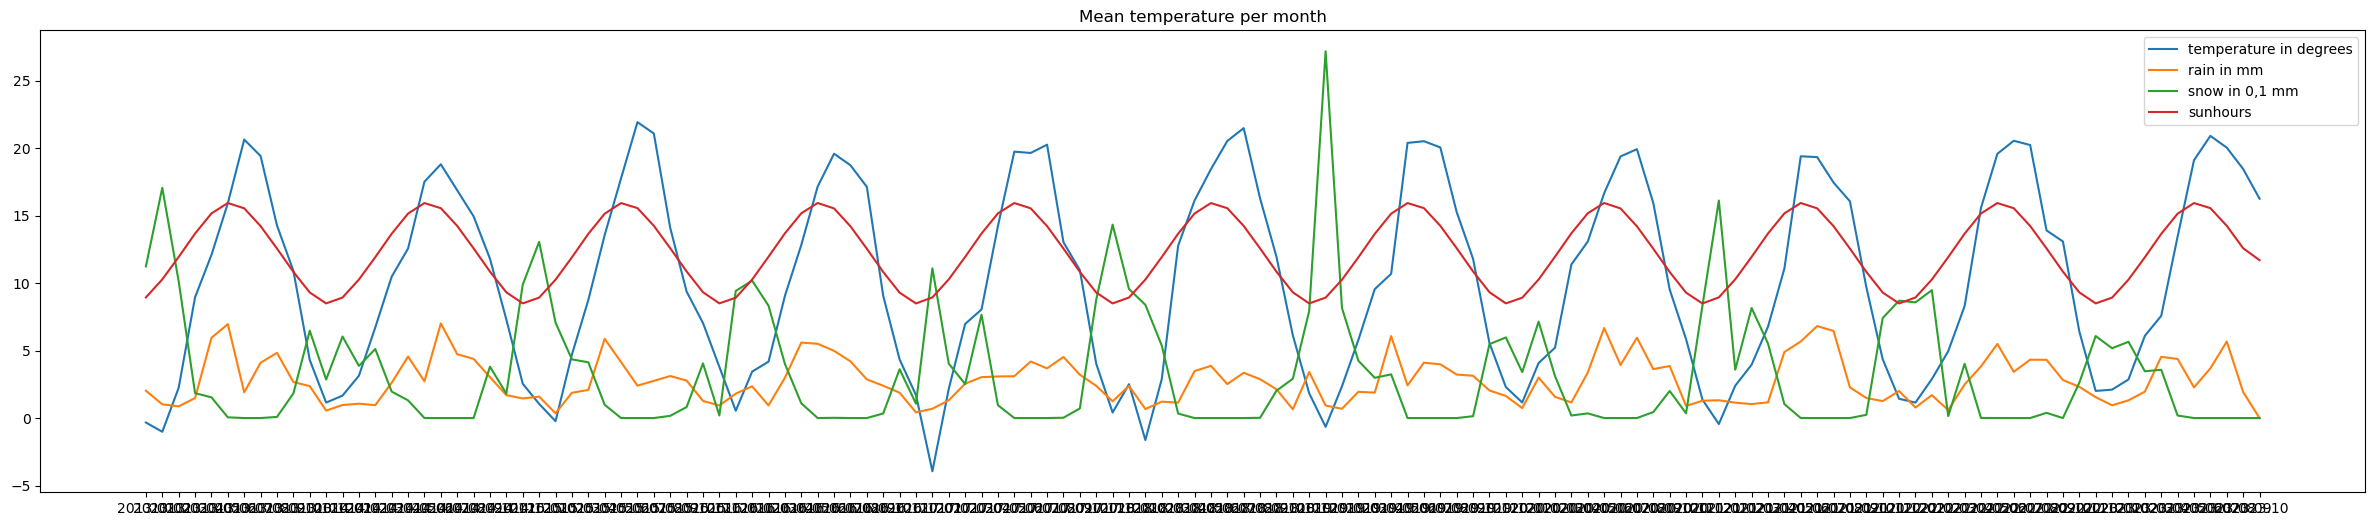

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 6))
ax.plot(temp_date,monthly_temp_data, label='temperature in degrees')
ax.plot(rain_date, monthly_rain_data, label = 'rain in mm')
ax.plot(snow_date, monthly_snow_data, label = 'snow in 0,1 mm')
ax.plot(sunhours_date, montly_sunhours_data, label = 'sunhours')

ax.legend()

ax.set_title('Mean temperature per month')

plt.show()

In [48]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# the list of unique countries
countries = weather_table['country'].unique()

# create a dash app in python
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Weather Data"),
    html.Label("Select a country:"),
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in countries],
        value='Finland'
    ),
    html.Label("Select a date range:"),
    dcc.DatePickerRange(
        id='date-range-picker',
        start_date='2016-01-01',
        end_date='2020-12-31'
    ),
    dcc.Checklist(
        id='weather-data-selection',
        options=[
            {'label': 'Temperature', 'value': 'temp_mean'},
            {'label': 'Rainfall', 'value': 'rain'},
            {'label': 'Snowfall', 'value': 'snow'},
            {'label': 'Sunhours', 'value': 'sun'},
        ],
        value=['temp_mean', 'rain', 'snow', 'sun']
    ),
    dcc.Graph(id='weather-plot'),
    html.Div(id='statistics')  # container for statistics
])

@app.callback(
    [Output('weather-plot', 'figure'),
     Output('mean_weather_plot', 'graph'),
     Output('statistics', 'children')],
    [Input('country-dropdown', 'value'),
     Input('date-range-picker', 'start_date'),
     Input('date-range-picker', 'end_date'),
     Input('weather-data-selection', 'value')]
)
def update_plot_and_statistics(selected_country, start_date, end_date, selected_data):
    # filter the data for the selected country and date range
    filtered_data = data[(data['country'] == selected_country) & (data['date'] >= start_date) & (data['date'] <= end_date)]

    fig = make_subplots(specs=[[{"secondary_y": True}]])  # Create subplots with a secondary y-axis

    for data_point in selected_data:
        if data_point == 'temp_mean':
            fig.add_trace(go.Scatter(x=filtered_data['date'], y=filtered_data[data_point], mode='lines', name='Temperature'))
        else:
            fig.add_trace(go.Scatter(x=filtered_data['date'], y=filtered_data[data_point], mode='lines', name=data_point))

    fig.update_layout(
        title=f'Weather Data in {selected_country}',
        xaxis_title="Date",
        xaxis_rangeslider_visible=True
    )

    graph = make_subplots(specs=[[{"secondary_y": True}]])  # Create subplots with a secondary y-axis

    if selected_data == 'temp_mean':
        graph.add_trace(go.Scatter(x=temp_date, y=monthly_temp_data, mode='lines', name='Mean Temperature'))

    graph.update_layout(
        title=f'Weather mean in {selected_country}',
        xaxis_title="Date",
        xaxis_rangeslider_visible=True
    )
                        
    statistics_text = html.Div([
        html.H2("Statistics"),
    ])
    for data_point in selected_data:
        mean_value = filtered_data[data_point].mean()
        max_value = filtered_data[data_point].max()
        min_value = filtered_data[data_point].min()
        statistics_text.children.append(html.P(f"Mean {data_point}: {mean_value:.2f}"))
        statistics_text.children.append(html.P(f"Max {data_point}: {max_value:.2f}"))
        statistics_text.children.append(html.P(f"Min {data_point}: {min_value:.2f}"))

    return fig, graph, statistics_text

if __name__ == '__main__':
    app.run_server(debug=True, port=8080)

In [41]:
pip install dash

  Obtaining dependency information for dash from https://files.pythonhosted.org/packages/00/69/d0ee9c6524678e98d336464d5c898182794c6b2ba1e5507bc7010a126ce2/dash-2.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for Flask<3.1,>=1.0.4 from https://files.pythonhosted.org/packages/36/42/015c23096649b908c809c69388a805a571a3bea44362fe87e33fc3afa01f/flask-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for Werkzeug<3.1 from https://files.pythonhosted.org/packages/c3/fc/254c3e9b5feb89ff5b9076a23218dafbc99c96ac5941e900b71206e6313b/werkzeug-3.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for plotly>=5.0.0 from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-non

In [51]:
aggregated_data = weather_table.groupby(['date','country', "longitude", "latitude"], as_index=False).mean(numeric_only=True)
filtered_data = aggregated_data[
    (aggregated_data["country"] == "Belgium")
]

print(filtered_data)

             date  country  longitude   latitude  level_0  temp_mean  \
1      2013-01-01  Belgium   4.469936  50.503887  21593.0      6.750   
28     2013-01-02  Belgium   4.469936  50.503887  21594.0      4.950   
55     2013-01-03  Belgium   4.469936  50.503887  21595.0      8.900   
82     2013-01-04  Belgium   4.469936  50.503887  21596.0      9.100   
109    2013-01-05  Belgium   4.469936  50.503887  21597.0      7.750   
...           ...      ...        ...        ...      ...        ...   
102751 2023-09-27  Belgium   4.469936  50.503887  25514.0     17.825   
102777 2023-09-28  Belgium   4.469936  50.503887  25515.0     18.525   
102803 2023-09-29  Belgium   4.469936  50.503887  25516.0     17.875   
102829 2023-09-30  Belgium   4.469936  50.503887  25517.0     14.175   
102855 2023-10-01  Belgium   4.469936  50.503887  25518.0     17.300   

        temp_max  temp_min    rain  snow  
1          8.950     3.275  11.375   0.0  
28         7.075     3.050   0.275   0.0  
55    